# Plot: optimal distance for forecasting the Lorenz system
as a function of horizon and output variable.

This notebook accompanies the following publication:
Paul Platzer, Arthur Avenas, Bertrand Chapron, Lucas Drumetz, Alexis Mouche, Léo Vinour. Distance Learning for Analog Methods. 2024. [⟨hal-04841334⟩](https://hal.science/hal-04841334)

It is used to plot optimized distance from numerical experiments with Lorenz system data (the results of "Notebook1"). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# settings for plots
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
matplotlib.rcParams.update({'font.size': 14})

In [3]:
data_folder = '../../data/lorenz/'
output_folder = '../../output/lorenz/'

# Load catalog

In [4]:
npzfile = np.load(data_folder + 'catalog_small.npz')
traj_norm = npzfile['traj_norm']
stds = npzfile['stds']
tau = npzfile['tau']
dt = npzfile['dt']
Ntrain = npzfile['Ntrain']
h_max = npzfile['h_max']

# Load baseline scores
Of unoptimized-distance analog forecasting.

In [5]:
npzfile = np.load(output_folder + 'score_baseline_lorenz_horizon_variable.npz')

hh_ind_done0 = npzfile['hh_ind_done']
horizon0 = npzfile['horizon']
mse0_whole = npzfile['mse0_whole']
mse0_zzvar = npzfile['mse0_zzvar']
k = npzfile['k']

# Load optimization results

In [6]:
npzfile = np.load(output_folder + 'optim_lorenz_horizon_variable.npz')

hh_ind_done = npzfile['hh_ind_done']
horizon = npzfile['horizon']
transform_optim_whole = npzfile['transform_optim_whole']
transform_optim_zzvar = npzfile['transform_optim_zzvar']
# mse_optim_whole = npzfile['mse_optim_whole']
# mse_optim_zzvar = npzfile['mse_optim_zzvar']
mse_optim_whole1 = npzfile['mse_optim_whole'][:,-1]
mse_optim_zzvar1 = npzfile['mse_optim_zzvar'][:,-1]
mse_optim_whole1 = np.append( npzfile['mse_optim_whole0'][-1] , mse_optim_whole1 )
mse_optim_zzvar1 = np.append( npzfile['mse_optim_zzvar0'][-1] , mse_optim_zzvar1 )
k = npzfile['k']
n_iter = npzfile['n_iter']
# learning_rate_factor = npzfile['learning_rate_factor']
learning_rate_factor_whole = npzfile['learning_rate_factor_whole']
learning_rate_factor_zzvar = npzfile['learning_rate_factor_zzvar']

# Plot figure 2

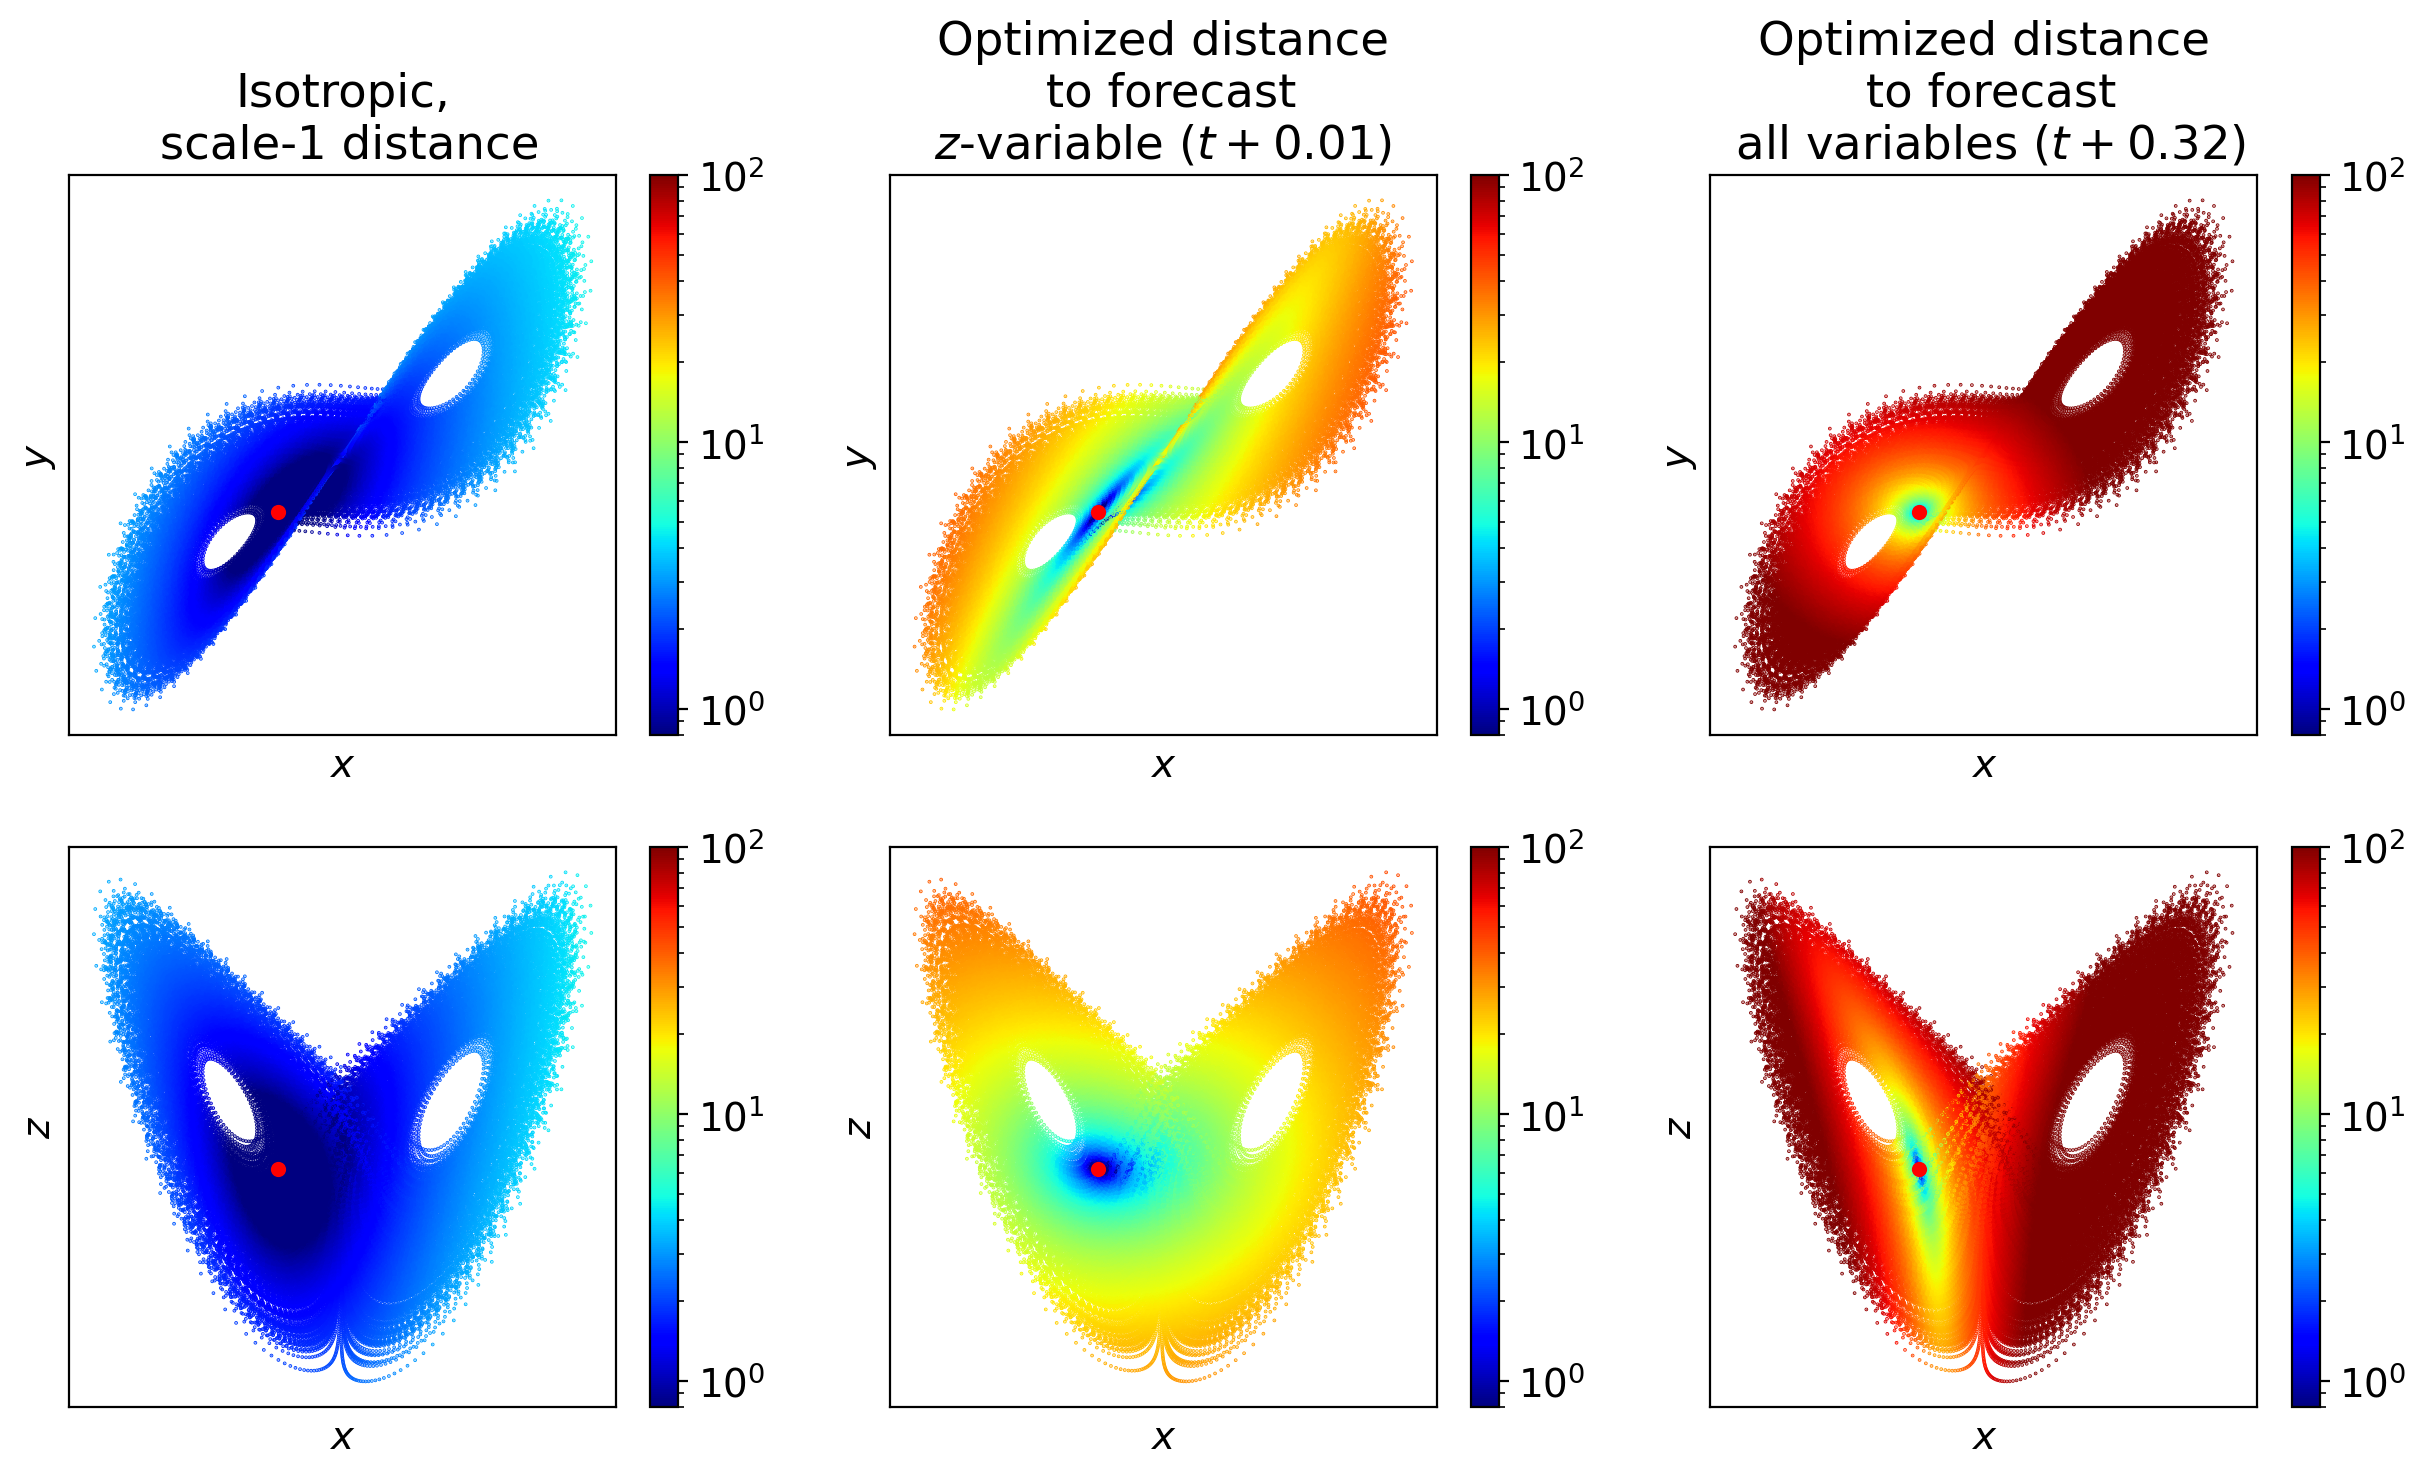

In [12]:
itar = 10
itar -= 1

Nplot = 10**5

target_norm = traj_norm[itar]
distances_nooptim = np.sqrt(np.sum((traj_norm[:Nplot] - target_norm)**2, axis=1))

hwhole = 31
train_optim_whole = np.matmul(traj_norm[:Nplot], transform_optim_whole[hwhole].T)
target_optim_whole = train_optim_whole[itar]
distances_optim_whole = np.sqrt(np.sum((train_optim_whole - target_optim_whole)**2, axis=1))

hvar = 0
train_optim_zzvar = np.matmul(traj_norm[:Nplot], transform_optim_zzvar[hvar].T)
target_optim_zzvar = train_optim_zzvar[itar]
distances_optim_zzvar = np.sqrt(np.sum((train_optim_zzvar - target_optim_zzvar)**2, axis=1))

plt.figure(figsize=(15,8), dpi=200); s = .1; s2 = 20
ftsz = 15

for i in range(2): # loop on couple of variables to show
    for j in range(3): # loop on distance type
        
        ind_subplot = 231 + 3*i + j
        plt.subplot(ind_subplot)
        
        xsub = [0,0][i]; ysub = [1,2][i]
        
        plt.title(['Isotropic,\n scale-1 distance',
                  'Optimized distance\n to forecast\n'+r'$z$'
                   +'-variable $(t+$'+str(dt*(hvar+1))+r'$)$',
                  'Optimized distance\n to forecast\n all variables '
                   +r'$(t+$'+str(dt*(hwhole+1))+r'$)$',][j]*(1-i))

        color_dist = [distances_nooptim, distances_optim_zzvar,
                      distances_optim_whole][j]
        
        im = plt.scatter(traj_norm[:Nplot,xsub], traj_norm[:Nplot,ysub], c=color_dist, s=s,
                         cmap='jet', norm=matplotlib.colors.LogNorm(vmin=.8,vmax=1e2))
        cb = plt.colorbar(im)
        clim = im.get_array().min(), im.get_array().max()
        plt.scatter([traj_norm[itar,xsub]], [traj_norm[itar,ysub]], c='r', s=s2)
        
        plt.xlabel([r'$x$',r'$y$',r'$z$'][xsub]); plt.ylabel([r'$x$',r'$y$',r'$z$'][ysub]);
        plt.xticks([]); plt.yticks([]); 

plt.savefig(output_folder + 'fig_l63_visual.png', bbox_inches='tight', dpi=200)
plt.show()

# Plot figure 3

In [8]:
# Compute "scale" of each variable's importance in optimized distance (norm of rows of matrix A)
scale_var_whole = np.sqrt( np.sum( transform_optim_whole**2 , axis=1 ) )
scale_var_zzvar = np.sqrt( np.sum( transform_optim_zzvar**2 , axis=2 ) )

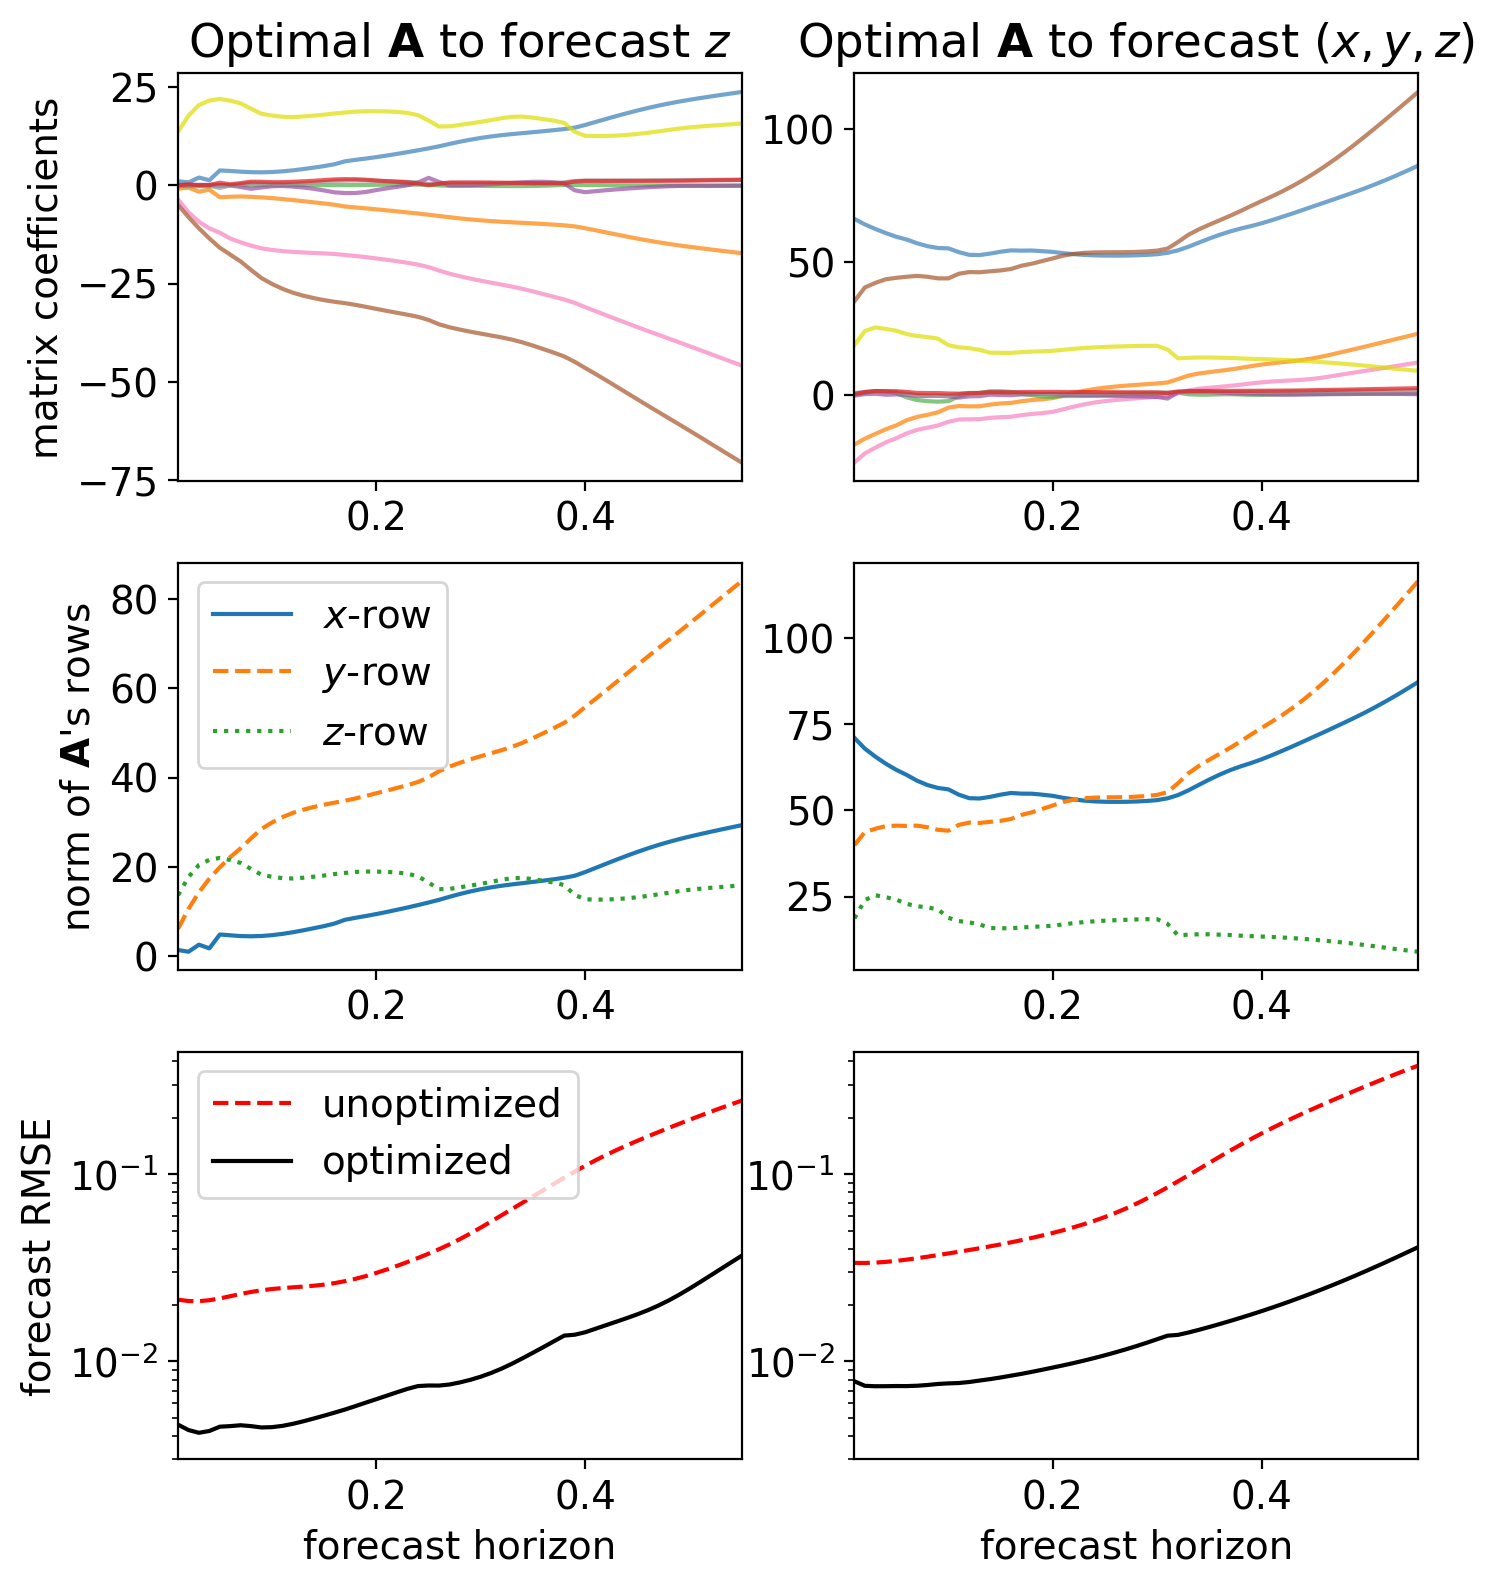

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(8,9), dpi=200)
    
for jplot in range(2):

    ## Plot coefficients
    
    for i in range(3):
        for j in range(3):
            ax[0,jplot].plot(horizon, [ transform_optim_zzvar[:,i,j],
                                      transform_optim_whole[:,i,j] ][jplot],
                color=cols[np.ravel_multi_index((i,j), dims=(3,3))], alpha=.7)
    
    ax[0,jplot].set_title(r'Optimal $\mathbf{A}$ to forecast '+
                 [ r'$z$' , r'$(x,y,z)$' ][jplot])
    ax[0,jplot].set_xlabel('');
    ax[0,jplot].set_ylabel(r"matrix coefficients"*(jplot==0))
    ax[0,jplot].set_xlim([horizon.min(),horizon.max()])
#     ax[0,jplot].set_ylim([2,100])
#     if jplot == 0:
#         ax[0,jplot].legend(loc = 'upper left')


    ## Plot norm of rows

    for i in range(3):
        ax[1,jplot].plot(horizon, np.abs([ scale_var_zzvar[:,i] ,
                                          scale_var_whole[:,i] ][jplot]),
             ['-','--',':'][i],
            label=['$x$','$y$','$z$'][i]+'-row')
    # plt.legend(loc = 'lower right', bbox_to_anchor = (1,.42))
#     ax[1,jplot].set_title(r'Optimal $\mathbf{A}$ to forecast '+
#                  [ r'$z$' , r'$(x,y,z)$' ][jplot])
    ax[1,jplot].set_xlabel('');
    ax[1,jplot].set_ylabel(r"norm of $\mathbf{A}$'s rows"*(jplot==0))
#     ax[1,jplot].set_yscale('log');
    ax[1,jplot].set_xlim([horizon.min(),horizon.max()])
    # ax[1,jplot].set_ylim([2,100])
#     ax[1,jplot].set_ylim((1,5*1e3))
    if jplot == 0:
        ax[1,jplot].legend(loc = 'upper left')

        
        
    ## Plot RMSE of prediction
    ax[2,jplot].plot(horizon0, np.sqrt([ mse0_zzvar ,
                                        mse0_whole ][jplot]), '--r',
            label=r'unoptimized')# ($\mathbf{A}=\mathbf{I}$)')
    ax[2,jplot].plot(horizon, np.sqrt([ mse_optim_zzvar1 ,
                                      mse_optim_whole1 ][jplot]), '-k',
            label=r'optimized')# $\mathbf{A}$')
    ax[2,jplot].set_ylabel(r'forecast RMSE'*(jplot==0))
    ax[2,jplot].set_xlabel('forecast horizon');
#     ax[2,jplot].set_ylim((.08,6))
    ax[2,jplot].set_xlim([horizon.min(),horizon.max()])
    ax[2,jplot].set_ylim([3e-3,.45])
    ax[2,jplot].set_yscale('log')
    if jplot == 0:
        ax[2,jplot].legend()

plt.savefig(output_folder + 'fig_l63_horizon.pdf', bbox_inches='tight', dpi=200)
plt.show()